Sicely Sohn

Pre-liminary format for Waesche 

Using 10mHz radar 

created march 11 2025

# 0. Load libraries

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import copy

from impdar.lib import load, gpslib
from impdar.lib import plot
# load the density-to-permittivity function from ImpDAR
from impdar.lib.permittivity_models import firn_permittivity

import copy

%matplotlib inline

In [3]:
#show the version of impdar that is being used, and where it is stored, for de-bugging purposes1
!pip show impdar

Name: impdar
Version: 1.2.0
Summary: Scripts for impulse radar
Home-page: 
Author: 
Author-email: David Lilien <dlilien@iu.edu>
License: LICENSE
Location: C:\Users\svsoh\anaconda3\Lib\site-packages
Requires: h5py, matplotlib, numpy, scipy, segyio
Required-by: 


# 1. Convert h5 to mat file
* BSI radar stores all lines within a single .h5 file. this command loads each of the lines and saves it as a .mat file in the same directory(folder) as the .h5 file.
* the below command accesses the file from the "raw" subfolder. Then, the .mat files are saved in the same "raw" subfolder
* I have not included all of the .mat files in this tutorial, but have included the raw .h5 file if you would like to try this step yourself1

In [13]:
!impdar load bsi raw/waesche010525.h5 --nans interp

Loading line_0 from raw/waesche011425.h5
Interpolating traces with bad GPS in line_0
Loading line_1 from raw/waesche011425.h5
Interpolating traces with bad GPS in line_1
Loading line_2 from raw/waesche011425.h5
Interpolating traces with bad GPS in line_2
Loading line_3 from raw/waesche011425.h5
Interpolating traces with bad GPS in line_3


# 1.2 find distance?
#list of line dataframes for 10mhz

In [15]:
line0105251 ='Waesche_Radar\10mhz\raw\waeche010525line_1_raw.mat'
dat0105251 = load.load('mat', line0105251, t_srs="EPSG:3031")[0]
line0105252 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waeche010525line_2_raw.mat'
dat0105252 = load.load('mat', line0105252, t_srs="EPSG:3031")[0]
line0105253 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waeche010525line_3_raw.mat'
dat0105253 = load.load('mat', line0105253, t_srs="EPSG:3031")[0]
line0105254 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waeche010525line_4_raw.mat'
dat0105254 = load.load('mat', line0105254, t_srs="EPSG:3031")[0]
line0105255 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waeche010525line_5_raw.mat'
dat0105255 = load.load('mat', line0105255, t_srs="EPSG:3031")[0]
line0105256 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waeche010525line_6_raw.mat'
dat0105256 = load.load('mat', line0105256, t_srs="EPSG:3031")[0]
line0105257 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waeche010525line_7_raw.mat'
dat0105257 = load.load('mat', line0105257, t_srs="EPSG:3031")[0]
line0106250 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010625line_0_raw.mat'
dat0106250 = load.load('mat', line0106250, t_srs="EPSG:3031")[0]
line0106251 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010625line_1_raw.mat'
dat0106251 = load.load('mat', line0106251, t_srs="EPSG:3031")[0]
line0106252 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010625line_2_raw.mat'
dat0106252 = load.load('mat', line0106252, t_srs="EPSG:3031")[0]
line0106253 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010625line_3_raw.mat'
dat0106253 = load.load('mat', line0106253, t_srs="EPSG:3031")[0]
line0106254 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010625line_4_raw.mat'
dat0106254 = load.load('mat', line0106254, t_srs="EPSG:3031")[0]
line0107250 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_0_raw.mat'
dat0107250 = load.load('mat', line0107250, t_srs="EPSG:3031")[0]
line0107251 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_1_raw.mat'
dat0107251 = load.load('mat', line0107251, t_srs="EPSG:3031")[0]
line0107252 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_2_raw.mat'
dat0107252 = load.load('mat', line0107252, t_srs="EPSG:3031")[0]
line0107253 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_3_raw.mat'
dat0107253 = load.load('mat', line0107253, t_srs="EPSG:3031")[0]
line0107254 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_4_raw.mat'
dat0107254 = load.load('mat', line0107254, t_srs="EPSG:3031")[0]
line0107255 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_5_raw.mat'
dat0107255 = load.load('mat', line0107255, t_srs="EPSG:3031")[0]
line0107256 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_6_raw.mat'
dat0107256 = load.load('mat', line0107256, t_srs="EPSG:3031")[0]
line0107257 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010725line_7_raw.mat'
dat0107257 = load.load('mat', line0107257, t_srs="EPSG:3031")[0]
line0108250 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_0_raw.mat'
dat0108250 = load.load('mat', line0108250, t_srs="EPSG:3031")[0]
line0108251 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_1_raw.mat'
dat0108251 = load.load('mat', line0108251, t_srs="EPSG:3031")[0]
line0108252 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_2_raw.mat'
dat0108252 = load.load('mat', line0108252, t_srs="EPSG:3031")[0]
line0108253 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_3_raw.mat'
dat0108253 = load.load('mat', line0108253, t_srs="EPSG:3031")[0]
line0108254 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_4_raw.mat'
dat0108254 = load.load('mat', line0108254, t_srs="EPSG:3031")[0]
line0108255 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_5_raw.mat'
dat0108255 = load.load('mat', line0108255, t_srs="EPSG:3031")[0]
line0108256 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_6_raw.mat'
dat0108256 = load.load('mat', line0108256, t_srs="EPSG:3031")[0]
line0108257 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_7_raw.mat'
dat0108257 = load.load('mat', line0108257, t_srs="EPSG:3031")[0]
line0108258 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_8_raw.mat'
dat0108258 = load.load('mat', line0108258, t_srs="EPSG:3031")[0]
line0108259 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche010825line_9_raw.mat'
dat0108259 = load.load('mat', line0108259, t_srs="EPSG:3031")[0]
line0114250 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche011425line_0_raw.mat'
dat0114250 = load.load('mat', line0114250, t_srs="EPSG:3031")[0]
line0114251 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche011425line_1_raw.mat'
dat0114251 = load.load('mat', line0114251, t_srs="EPSG:3031")[0]
line0114252 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche011425line_2_raw.mat'
dat0114252 = load.load('mat', line0114252, t_srs="EPSG:3031")[0]
line0114253 = 'C:\Users\svsoh\Waesche_Radar\10mhz\raw\waesche011425line_3_raw.mat'
dat0114253 = load.load('mat', line0114253, t_srs="EPSG:3031")[0]
print

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\svsoh\AppData\Local\Temp\ipykernel_10316\3651028757.py:1: SyntaxWarning: invalid escape sequence '\w'
  line0105251 ='Waesche_Radar\10mhz\raw\waeche010525line_1_raw.mat'


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3651028757.py, line 3)

In [ ]:
lines= [...]
#start with 0
total_distance = 0

#loop through each line and add the max distance to your total distance count for line in lines: 
total_distance += line.dist.max()

print(total_distance)



# 2. Load raw data
This is going to look pretty gross until we filter it.. dont worry! that will come later.

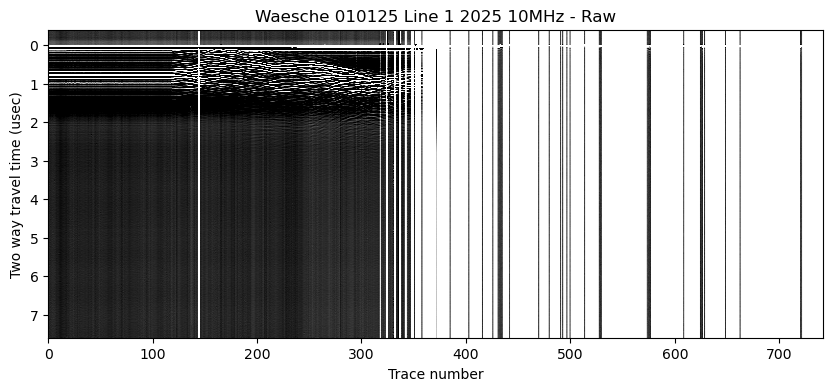

In [3]:
## Raw data
line = 'C:/Users/svsoh/Waesche_Radar/10mhz/sharkfin/corrected/waesche010125line_1_raw_corrected.mat'
##
site = 'Waesche 010125 Line 1 2025 10MHz'
## 
filename = 'waesche010125_line1'
##########

#load data as dat, define coordinate reference grid for Waesche
dat = load.load('mat', line, t_srs="EPSG:3031")[0]
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site +' - Raw');
plot.plot_radargram(dat, fig=fig, ax = ax);
plt.show()

## 2.1 view information about the radar line
* aside from plotting, you can also access information that is stored within the .mat file to get basic information about the radar line 

In [5]:
## this command prints all of the variables that are stored within the data that has been loaded as "dat"
print(dat.__dir__())

['chan', 'data', 'decday', 'dt', 'pressure', 'snum', 'tnum', 'trace_int', 'trace_num', 'travel_time', 'trig', 'trig_level', 'nmo_depth', 'lat', 'long', 'elev', 'dist', 'x_coord', 'y_coord', 'fn', 't_srs', 'data_dtype', 'flags', 'picks', '__module__', '__doc__', 'attrs_guaranteed', 'attrs_optional', 'stodeep_attrs', '__str__', 'reverse', 'nmo', 'crop', 'hcrop', 'restack', 'rangegain', 'agc', 'constant_space', 'elev_correct', 'constant_sample_depth_spacing', 'traveltime_to_depth', 'clean_GPS', 'save', 'save_as_segy', 'output_shp', 'output_csv', '_get_pick_targ_info', 'output_ogr', 'adaptivehfilt', 'horizontalfilt', 'highpass', 'winavg_hfilt', 'hfilt', 'vertical_band_pass', 'denoise', 'migrate', 'horizontal_band_pass', 'lowpass', '__init__', '_parse_stodeepdata', 'check_attrs', 'get_projected_coords', 'get_ll', 'datetime', '__dict__', '__weakref__', '__new__', '__repr__', '__hash__', '__getattribute__', '__setattr__', '__delattr__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge_

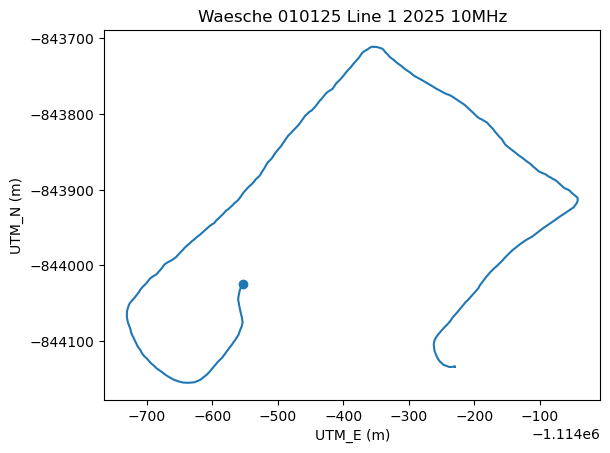

In [7]:
plt.plot(dat.x_coord, dat.y_coord) # this plots the UTM coordinates where the data was collected
plt.scatter(dat.x_coord[0], dat.y_coord[0]) # this puts a dot at the start (first trace) of the radar line
# update axes labels
plt.title(site)
plt.xlabel('UTM_E (m)')
plt.ylabel('UTM_N (m)')
plt.show()

In [9]:
# print number of samples per trace (also known as samples per scan):
print('Total number of samples:  ' + str(dat.snum))

# print total number of traces (aka scans):
print('\n') #prints a new line
print('Total number of traces:  ' + str(dat.tnum))

#print travel time:
print('\n')
print('total acquisition time for each trace (scan), given in micro seconds!! (1e-6):')
print(dat.travel_time.max())

# print difference in time between each sample
print('\n')
print('dt between each sample (in seconds):  ' + str(dat.dt))

#print total distance covered by the line:
print('\n')
print('total distance of the radar line (in km):  ' + str(dat.dist.max()))

Total number of samples:  2000


Total number of traces:  743


total acquisition time for each trace (scan), given in micro seconds!! (1e-6):
7.595999995325562


dt between each sample (in seconds):  4e-09


total distance of the radar line (in km):  1.5664500389110316


# 3. time zero
Now, we start processing!
First, we do a time-zero correction by cropping the pretrigger. this is easy with the bsi data, because it is automatic!

In [11]:
##  before each processing step, i make a copy of the data 
## so that If i need to change anything in this step, i don't have to reload the file
## and it won't affect other processing steps

crop_dat =copy.deepcopy(dat) #copies the raw data (dat), now saved as "cropped_dat"

crop_dat.crop(0., dimension='pretrig') # vertically crops the data prior to the pretrigger
## printed below is the number of samples that is reduced (ie, there are 119 samples here before the pretrigger)



Vertical samples reduced to subset [100:2000] of original


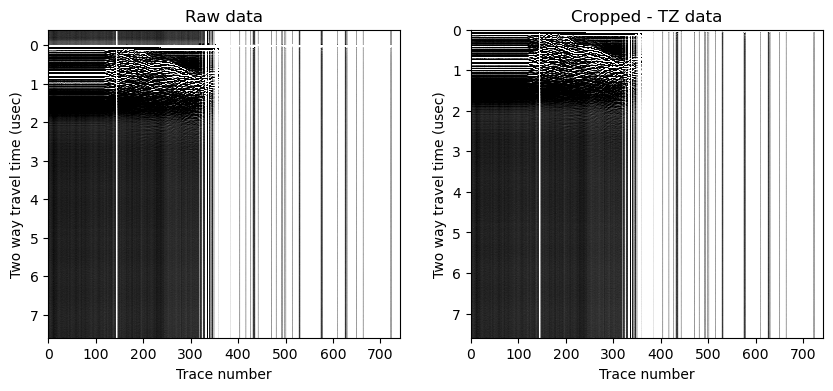

In [13]:
#plot to see the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4)) ## set up to plots next to each other
## plot the raw data (dat)
ax1.set_title('Raw data')
plot.plot_radargram(dat, fig = fig, ax = ax1)
## plot the cropped data (crop_dat)
ax2.set_title('Cropped - TZ data')
plot.plot_radargram(crop_dat, fig = fig, ax = ax2)
plt.show()

# 4. vertical band pass
*  this step is very helpful for being able to see the reflectors better!

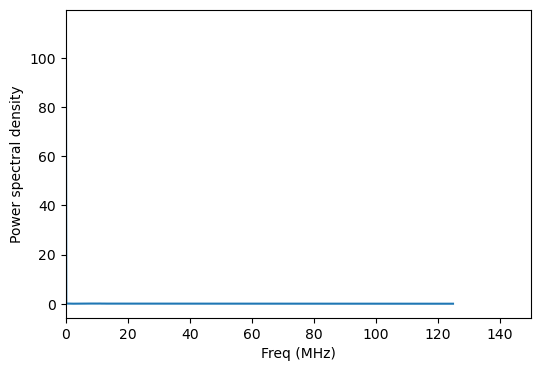

In [15]:
## let's find the ideal range for our bandpass
fig, ax = plt.subplots(figsize = (6,4))
plot.plot_ft(dat,fig = fig, ax = ax)
plt.xlim(0,150)
plt.show()

Bandpassing from  5.0 to 80.0 MHz...
Bandpass filter complete.


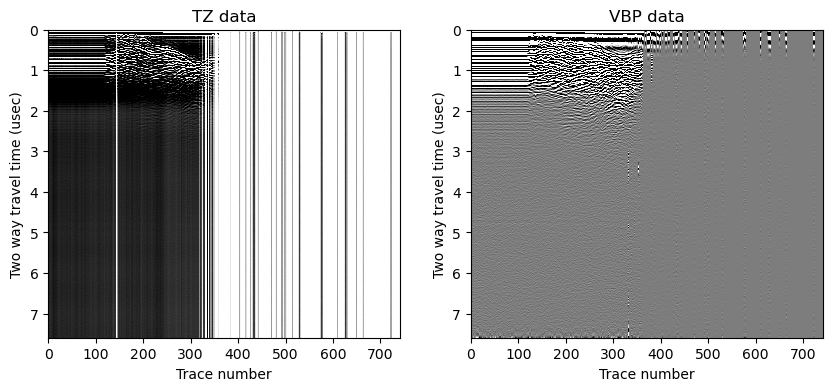

In [21]:
# again, make a copy so that you can play around with this step if needed
vbp_dat = copy.deepcopy(crop_dat)
##BANDPASS -- play around with this to see what works bets for your data
vbp_dat.vertical_band_pass(5, 80) ## here, I chose to vertical bandpass betwen 2 - 20 MHZ for a 5mhz antenna.

#plot to see the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4)) ## set up to plots next to each other
## plot the raw data (dat)
ax1.set_title('TZ data')
plot.plot_radargram(crop_dat, fig = fig, ax = ax1)
## plot the cropped data (crop_dat)
ax2.set_title('VBP data')
plot.plot_radargram(vbp_dat, fig = fig, ax = ax2)
plt.show()

# 5. Clip stationary periods
* here, we use an interpolation to set constant trace spacing, and then using a minimum movement threshold to crop out stationary periods (where data was still being collected, but the radar wasn't moving)

In [23]:
#first, print the average distance between traces to see what contant spacing to use in the next step
increments = np.diff(dat.dist)
print(np.mean(increments)*1.0e3)

2.1111186508234927


C:\Users\svsoh\anaconda3\Lib\site-packages\impdar\lib\RadarData\_RadarDataProcessing.py:542: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


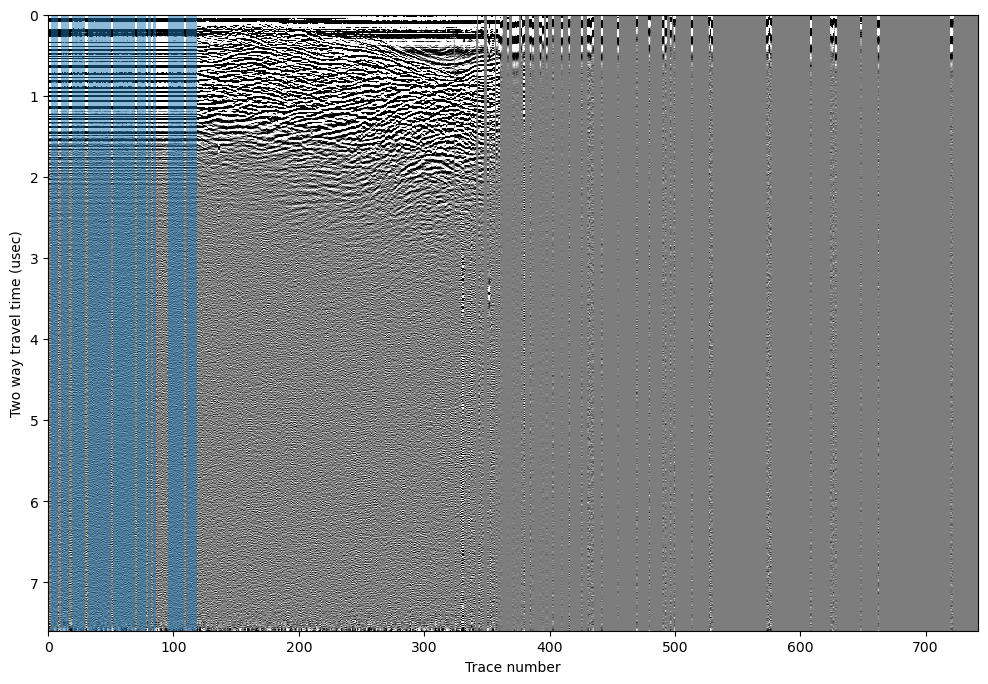

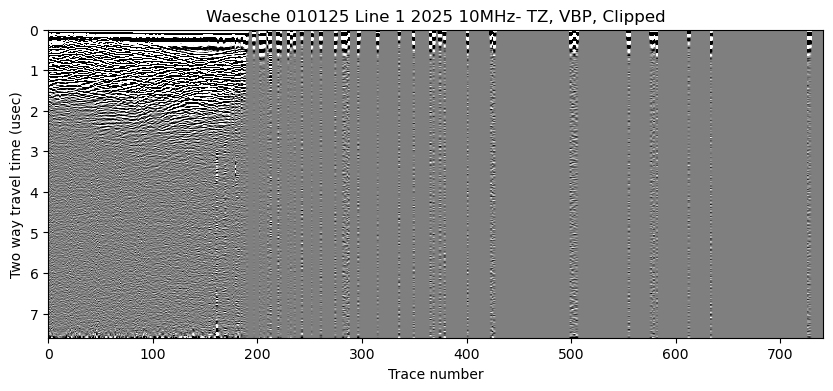

In [25]:
## CLIP STATIONARY PERIODS
clip_dat = copy.deepcopy(vbp_dat) #again, make a copy of the data from the last processing step

## change the spacing here to fit your data!!
# if you use a value larger than the average distance between spaces, you will reduce the total number of traces in your data
# if you use a smaller value, you will increase the number of traces, effectively "making up" data points
# you will also need to change the min_movement to effectively capture stationary periods in your data - 
clip_dat.constant_space(2.11, min_movement = 0.05, show_nomove=True) 

fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site + '- TZ, VBP, Clipped');
plot.plot_radargram(clip_dat, fig=fig, ax = ax)
plt.show()

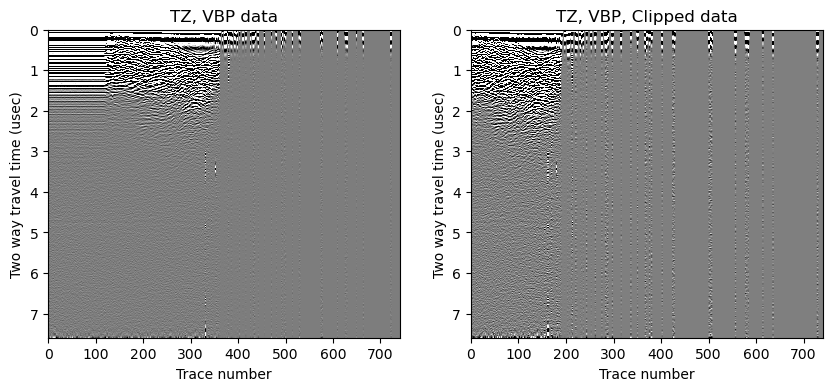

In [27]:
## plot clipped and unclipped next to each other to compare:

#plot to see the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4)) ## set up to plots next to each other
## plot the raw data (dat)
ax1.set_title('TZ, VBP data')
plot.plot_radargram(vbp_dat, fig = fig, ax = ax1)
## plot the cropped data (crop_dat)
ax2.set_title('TZ, VBP, Clipped data')
plot.plot_radargram(clip_dat, fig = fig, ax = ax2)
plt.show()

# 6. NMO - with density profile
* Here, we use the Normal Move Out correction to convert twtt to depth.
* you can use help(dat.nmo) to get more information about ways that you can adjust this function

Normal Moveout filter complete.


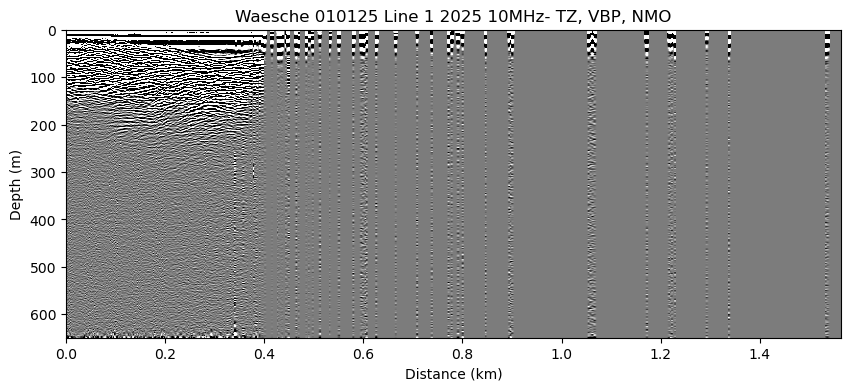

In [29]:
#first, make a copy of the last processing step
nmo_dat=copy.deepcopy(clip_dat)

## Normal Move out = 30 becaue 30m is distance between Tx and Rx in the 5MHz antenna
# for the 10mhz antenna, the spacing should be 15m.
## I am not using a density profile here for simplicity, but you can if you have one!
# you can also adjust the velocity of the radar wave to a set value, if you suspect you are mostly dealing with firn rather than ice!
nmo_dat.nmo(15)
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site + '- TZ, VBP, NMO');
plot.plot_radargram(nmo_dat, fig=fig, ax = ax, xdat='dist', ydat='depth') #now we can plot with depth on the y-axis!
plt.show()

In [25]:
## cropping further
help(dat.crop)

Help on method crop in module impdar.lib.RadarData._RadarDataProcessing:

crop(lim, top_or_bottom='top', dimension='snum', uice=169000000.0, rezero=True, zero_trig=True) method of impdar.lib.RadarData.RadarData instance
    Crop the radar data in the vertical. We can take off the top or bottom.

    This will affect data, travel_time, and snum.

    Parameters
    ----------
    lim: float (int if dimension=='snum')
        The value at which to crop.
    top_or_bottom: str, optional
        Crop off the top (lim is the first remaining return) or the bottom
        (lim is the last remaining return).
    dimension: str, optional
        Evaluate in terms of sample (snum), travel time (twtt), or depth (depth).
        If depth, uses nmo_depth if present and use uice with no transmit/receive separation.
        If pretrig, uses the recorded trigger sample to crop.
    rezero: bool, optional
        Set the zero on the y axis to the cropped value (if cropping off the top). Default True.
 

Vertical samples reduced to subset [100:1284] of original


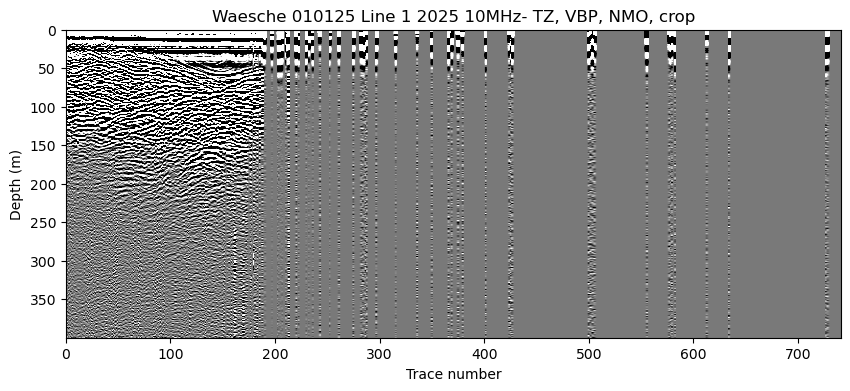

In [31]:
crop_dat=copy.deepcopy(nmo_dat)
crop_dat.crop(400, top_or_bottom='bottom', dimension='depth')
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site + '- TZ, VBP, NMO, crop');
plot.plot_radargram(crop_dat, fig=fig, ax = ax, ydat='depth') #now we can plot with depth on the y-axis!
plt.show()

In [45]:
#help(dat.hfilt)
help(dat.adaptivehfilt)

Help on method adaptivehfilt in module impdar.lib.RadarData._RadarDataFiltering:

adaptivehfilt(window_size, *args, **kwargs) method of impdar.lib.RadarData.RadarData instance
    Adaptively filter to reduce noise in upper layers

    This subtracts the average of traces around an individual trace in order to filter it.
    You can call this method directly, or it can be called by sending the
    'adaptive' option to :func:`RadarData.hfilt() <impdar.lib.RadarData.RadarData.hfilt>`

    Parameters
    ----------
    window_size: int
        number of traces to include in the moving average to be removed

    Original StoDeep Documentation:
       HFILTDEEP-This StoDeep subroutine processes bandpass filtered
       or NMO data to reduce the horizontal noise in the upper layers.
       The user need not specify any frequencies.  This program simply
       takes the average of all of the traces and subtracts it from the
       bandpassed data.  It will remove most horizontally-oriented
   

Subtracting mean trace found between 0 and 180
Horizontal filter complete.


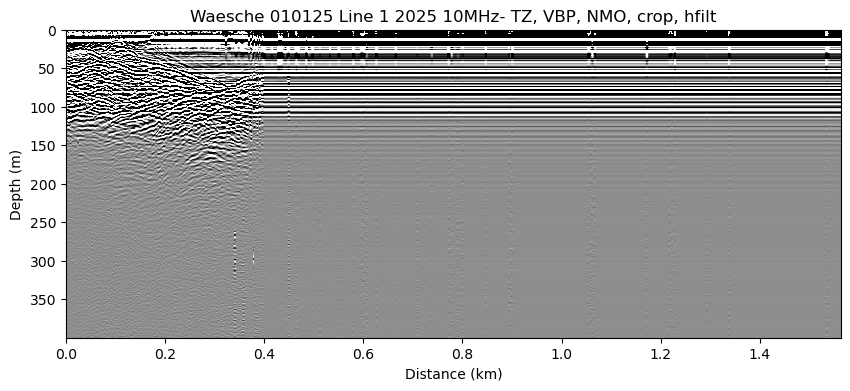

In [33]:
hfilt_dat=copy.deepcopy(crop_dat)
hfilt_dat.hfilt(ftype='hfilt', bounds=(0,180), window_size=None)
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site + '- TZ, VBP, NMO, crop, hfilt');
plot.plot_radargram(hfilt_dat, fig=fig, ax = ax, xdat='dist', ydat='depth') #now we can plot with depth on the y-axis!
plt.show()

Adaptive filtering
Adaptive filtering complete


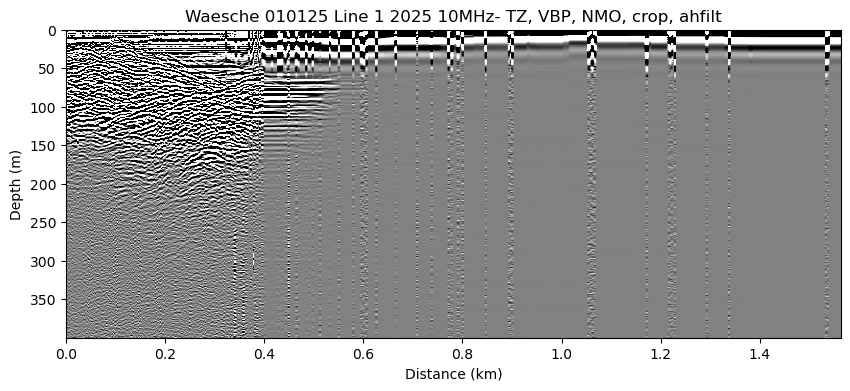

In [35]:
ahfilt_dat=copy.deepcopy(crop_dat)
ahfilt_dat.adaptivehfilt(150)
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site + '- TZ, VBP, NMO, crop, ahfilt');
plot.plot_radargram(ahfilt_dat, fig=fig, ax = ax, xdat='dist', ydat='depth') #now we can plot with depth on the y-axis!
plt.show()

# 7. Export filtered data for migration!

In [31]:
# Save processed data at .mat file
nmo_dat.data_dtype = np.float64
nmo_dat.save(filename+'_filtered.mat')

# 8. migrate & stack

MAKE SURE SEISUNIX IS INSTALLED! then use the command line (termial) to migrate. you can also do it here by including an ! before the command. 

Depending on the filesize, it could take a while..

impproc migrate --mtype sumigtk [filename]

In [ ]:
impproc migrate --mtype sumigtk

In [33]:
##trying other migrations methods
##migrate with stolt, copying whatever your data was stored as before you are going to migrate (here, i just put "filtered_dat".. but it might be "nmo_dat" in your script?)
mig_dat = copy.deepcopy(ahfilt_dat)
mig_dat.migrate(mtype='stolt');
## then add code for plotting to visualize..
plot.plot_radargram(mig_dat, fig=fig, ax = ax, xdat='dist', ydat='depth')


Stolt Migration (f-k migration) of 1036x1549 matrix
(1549,) (519,) (519, 1549)
Interpolating from temporal frequency (ws) to vertical wavenumber (kz):
Interpolating:
0 MHz, 24 MHz, 48 MHz, 72 MHz, 96 MHz, 120 MHz, 
Stolt Migration of 1036x1549 matrix complete in 33.92 seconds


(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Waesche 010525 Line 6 2025 10MHz- TZ, VBP, NMO, crop, ahfilt'}, xlabel='Distance (km)', ylabel='Depth (m)'>)

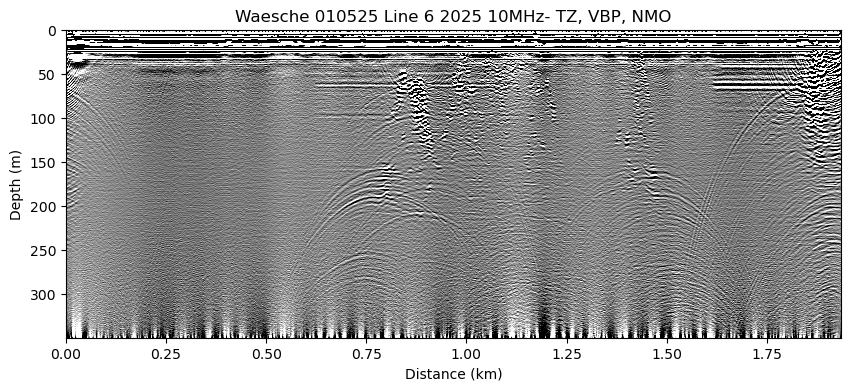

In [35]:
#nmo_dat.nmo(15)
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site + '- TZ, VBP, NMO');
plot.plot_radargram(mig_dat, fig=fig, ax = ax, xdat='dist', ydat='depth')
plt.show()

In [ ]:
## migrate with kirchhoff:
mig_dat = copy.deepcopy(nmo_dat)
mig_dat.migrate(mtype='kirch');
## then add code for plotting to visualize
## then add code for plotting to visualize
# Save processed data at .mat file
mig_dat.data_dtype = np.float64
mig_dat.save(filename+'_filtered_migrated.mat')
##

Kirchhoff Migration (diffraction summation) of 1447x1565 matrix
Migrating trace number:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 20

In [ ]:
##nmo_dat.nmo(15)
fig, ax = plt.subplots(figsize=(10,4))
ax.set_title(site + '- TZ, VBP, NMO, mig');
plot.plot_radargram(mig_dat, fig=fig, ax = ax, xdat='dist', ydat='depth')
plt.show()

In [131]:
!pip show seisunix

## 8.1 load and plot migrated data

In [125]:
mig_dat =  load.load('mat', filename+'_filtered_migrated.mat', t_srs="EPSG:3031")[0]

FileNotFoundError: [Errno 2] No such file or directory: 'waesche010525_line1_filtered_migrated.mat'

In [123]:
#plot to see the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4)) ## set up to plots next to each other
## plot the raw data (dat)
ax1.set_title('TZ, VBP, Clipped, NMO data')
plot.plot_radargram(nmo_dat, fig = fig, ax = ax1, xdat = 'dist', ydat='dual')
## plot the cropped data (crop_dat)
ax2.set_title('Migrated data')
plot.plot_radargram(mig_dat, fig = fig, ax = ax2,  xdat = 'dist', ydat='dual')
plt.tight_layout() #this prevents axes from overlapping
plt.show()

NameError: name 'mig_dat' is not defined

Note: here, we can see quite a bit of overmigration artifact in the migrated data (right pannel) where there are "upward smiley" hyperbola tails pointing upwards. There are a few ways to address this:
1) the radar velocity might not be quite right -- for example, here at eclipse there is quite a bit of firn! so including a density profile at the NMO step (actual or estimated) can help to reduce overmigration.
2) filtering after migration to reduce visible artifacts by stacking the data and using additional filters (see next step)

# 9. Denoise and Restack
* using denoise and restacing filters can be helpful after migrating to reduce noise and artifacts.
* depending on what your data looks like, you may also want to crop from the left, right, top, or bottom also.

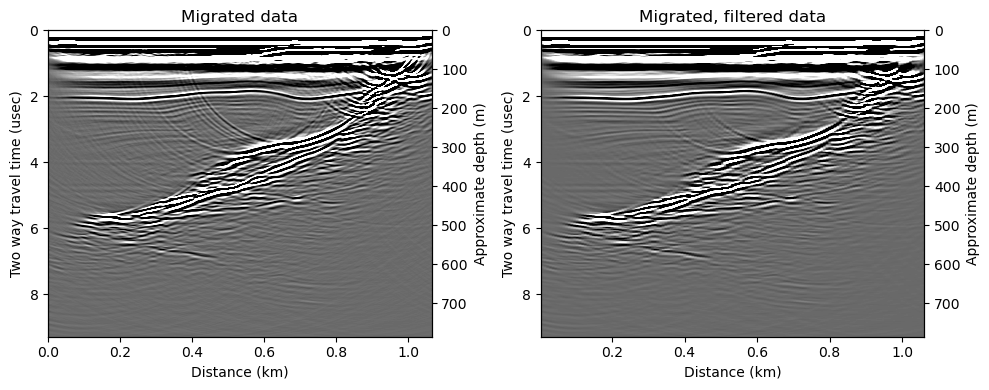

In [37]:
filt_dat = copy.deepcopy(mig_dat) #again, we make a copy before we apply filters
filt_dat.denoise(3)
filt_dat.restack(5) ## the number of traces being stacked (horizontal stacking)

#plot to see the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4)) ## set up to plots next to each other
## plot the raw data (dat)
ax1.set_title('Migrated data')
plot.plot_radargram(mig_dat, fig = fig, ax = ax1, xdat = 'dist', ydat='dual')
## plot the cropped data (crop_dat)
ax2.set_title('Migrated, filtered data')
plot.plot_radargram(filt_dat, fig = fig, ax = ax2,  xdat = 'dist', ydat='dual')
plt.tight_layout() #this prevents axes from overlapping
plt.show()

In [39]:
# Save filtered data at .mat file
filt_dat.data_dtype = np.float64
filt_dat.save(filename+'_filtered_migrated_filtered.mat')


# 10. pick and plot
* use the command line again (just like how you migrated) to open the GUI to pick isochrones in the radargram
* imppick -xd -yd [filename]
  * adjust the frequency to 15 (or whatever the center frequency of your antenna is)
  * New pick -> select mode
  * pick the line
  * file > save .mat > save as > [filename]_picked.mat
* in this example, i pick 2 different "picks" - 1 (light blue) is for a clear isochrone (volcanic horizon), the 2nd is a hasty pick of the aproximate bed reflection (green) -- which is pretty tricky here to cleraly identify because of the sloping bedrock.

In [41]:
## load and plot
picked_dat = load.load('mat', filename+'_filtered_migrated_filtered_picked.mat', t_srs="EPSG:32607")[0]

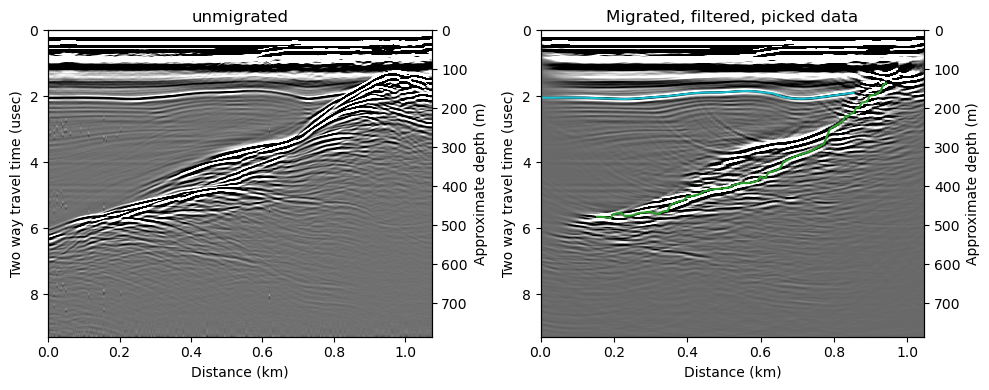

In [43]:
#plot to see the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4)) ## set up to plots next to each other
## plot the raw data (dat)
ax1.set_title('unmigrated')
plot.plot_radargram(nmo_dat, fig = fig, ax = ax1, xdat = 'dist', ydat='dual')
## plot the cropped data (crop_dat)
ax2.set_title('Migrated, filtered, picked data')
plot.plot_radargram(picked_dat, fig = fig, ax = ax2,  xdat = 'dist', ydat='dual', pick_colors = ['tab:cyan', 'tab:green'])
plt.tight_layout() #this prevents axes from overlapping
plt.show()